## Starting Modeling process after some practice. Now using full data set, trying OHE, looking at correlations and iterating

Note: data_cleaned file has been edited since. This run through did not have columns
- mon_of_sale_num from date
- season_of_same from mon_of_sale_num
- mon_of_sale_name from mon_of_sale_num
- single_fam_home = 0 is bedrooms > 5, 1 if bedrooms >= 5

In this notebook 'yr_of_sale' is labelled yr_of assessment -- it was mislabeled. The date in the original data referes to the year the home was sold

From assigment: It is up to you to decide what data from this dataset to use and how to use it. If you are feeling overwhelmed or behind, we recommend you ignore some or all of the following features:

- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

## Now to start modeling process

In [321]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# Import scikit learn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [322]:
data = pd.read_csv('data_cleaned.csv')

In [323]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_of_sale',
       'mon_of_sale_num', 'mon_of_sale_name', 'season_of_sale',
       'has_been_viewed', 'grade_category', 'has_basement',
       'has_been_renovated', 'in_seattle', 'single_fam_home',
       'price_in_thousands'],
      dtype='object')

In [324]:
import seaborn as sns

Keep in mind outliers from Data Cleansing (look back at notebook)

In [325]:
# Overview of final data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21597 non-null  int64  
 1   date                21597 non-null  object 
 2   price               21597 non-null  float64
 3   bedrooms            21597 non-null  int64  
 4   bathrooms           21597 non-null  float64
 5   sqft_living         21597 non-null  int64  
 6   sqft_lot            21597 non-null  int64  
 7   floors              21597 non-null  float64
 8   waterfront          21597 non-null  float64
 9   view                21597 non-null  float64
 10  condition           21597 non-null  int64  
 11  grade               21597 non-null  int64  
 12  sqft_above          21597 non-null  int64  
 13  sqft_basement       21597 non-null  float64
 14  yr_built            21597 non-null  int64  
 15  yr_renovated        21597 non-null  int64  
 16  zipc

## One Hot Encoding, just grade_category

In [326]:
# grade_category is last string left - only 3 categories, One Hot Encode. 
data_OHE = pd.get_dummies(data, columns=['grade_category'])
# Not dropping first, exploring feature importance

In [327]:
data_OHE.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,season_of_sale,has_been_viewed,has_basement,has_been_renovated,in_seattle,single_fam_home,price_in_thousands,grade_category_Average,grade_category_High,grade_category_Low
0,5437600140,2015-01-10,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,Winter,1,0,0,0,1,325.0,1,0,0
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,Winter,1,1,0,1,1,540.0,1,0,0
2,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,Winter,1,0,0,1,1,344.0,1,0,0
3,7504100360,2015-01-12,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,Winter,1,0,0,0,1,565.0,1,0,0
4,2787700180,2015-01-12,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,Winter,1,0,0,0,1,320.0,1,0,0


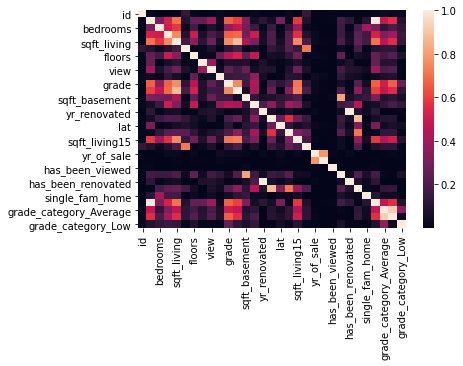

In [328]:
sns.heatmap(data_OHE.corr().abs())
plt.show()

## Modeling with grade_category OHE

In [329]:
# Define X and y
X_cols = [c for c in data_OHE.columns.to_list() if c not in ['id', 'date','price', 'price_in_thousands', 
                                                             'mon_of_sale_name', 'season_of_sale']]

X = data_OHE[X_cols]
y = data_OHE['price']

In [330]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [331]:
# Instantiate a scaler
scaler = StandardScaler()

In [332]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [333]:
# Instantiate a linear regression model
lr = LinearRegression()

In [334]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [335]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.7131322077984461
Mean Absolute Error: 121338.92831310982
---
Testing Scores:
R2: 0.7315097577263349
Mean Absolute Error: 122341.25549925867
Root Mean Squared Error: 349.7731486253035


In [336]:
data_OHE.corr().price.sort_values(ascending=False)
# grade_category High is correlated, Low and Average are not

price_in_thousands        1.000000
price                     1.000000
sqft_living               0.701917
grade                     0.667951
sqft_above                0.605368
sqft_living15             0.585241
grade_category_High       0.559649
bathrooms                 0.525906
view                      0.393749
sqft_basement             0.322192
bedrooms                  0.308787
lat                       0.306692
waterfront                0.264306
floors                    0.256804
has_basement              0.178264
yr_renovated              0.117855
has_been_renovated        0.117543
sqft_lot                  0.089876
sqft_lot15                0.082845
yr_built                  0.053953
condition                 0.036056
long                      0.022036
yr_of_sale                0.003727
mon_of_sale_num          -0.009928
in_seattle               -0.011959
has_been_viewed          -0.012024
id                       -0.016772
zipcode                  -0.053402
grade_category_Low  

In [337]:
# look at the coefficients with the names of each col
dict(zip(X.columns, lr.coef_))
# pd.DataFrame.from_dict(dict(zip(X.columns, lr.coef_)), orient='index')

{'bedrooms': -27030.66740343307,
 'bathrooms': 29428.695625011133,
 'sqft_living': 59989.35272585397,
 'sqft_lot': 2590.846045668812,
 'floors': -4713.524102498773,
 'waterfront': 50561.56239108051,
 'view': 38089.592651614104,
 'condition': 24668.86622492885,
 'grade': 90174.82687367774,
 'sqft_above': 97244.71349057448,
 'sqft_basement': 31001.667089196828,
 'yr_built': -55261.84510106057,
 'yr_renovated': 1226773.0520214962,
 'zipcode': -88973.83654948833,
 'lat': 77894.96165434849,
 'long': -9125.310298981263,
 'sqft_living15': 17308.03115179528,
 'sqft_lot15': -10097.90958814214,
 'yr_of_sale': 17589.952597839547,
 'mon_of_sale_num': 3999.454104510884,
 'has_been_viewed': -159.17030556164906,
 'has_basement': -413.732423775404,
 'has_been_renovated': -1213616.0966478374,
 'in_seattle': 90147.80296694823,
 'single_fam_home': -2282.48920924672,
 'grade_category_Average': -20791.959449154037,
 'grade_category_High': 20198.892292091215,
 'grade_category_Low': 4999.1816568641025}

## Now try with statsmodels - OHE

In [338]:
model = sm.OLS(y, sm.add_constant(X))

In [339]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     2035.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:20:44   Log-Likelihood:            -2.9372e+05
No. Observations:               21597   AIC:                         5.875e+05
Df Residuals:                   21569   BIC:                         5.877e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.132e+07   8.23e+06      5.023      0.000    2.52e+07    5.74e+07
bedrooms               -2.906e+04   1997.316    -14.550      0.000    -3.3e+04   -2.51e+04
bathrooms               3.827e+04   3199.814     11.959      0.000     3.2e+04    4.45e+04
sqft_living               72.6931     20.584      3.532      0.000      32.347     113.039
sqft_lot                   0.1064      0.046      2.288      0.022       0.015       0.198
floors                 -8346.0349   3643.402     -2.291      0.022   -1.55e+04   -1204.698
waterfront              6.381e+05   1.77e+04     36.143      0.000    6.03e+05    6.73e+05
view                    5.002e+04   2064.800     24.224      0.000     4.6e+04    5.41e+04
condition               3.727e+04   2299.601     16.208      0.000    3.28e+04    4.18e+04
grade                   7.772e+04   2437.293     31.890      0.000    7.29e+04    8.25e+04
sqft_above                99.8083     20.609      4.843      0.000      59.413     140.203
sqft_basement             71.0237     21.054      3.373      0.001      29.756     112.291
yr_built               -1853.3716     74.014    -25.041      0.000   -1998.445   -1708.298
yr_renovated            3529.4592    462.215      7.636      0.000    2623.483    4435.436
zipcode                -1655.4694     54.592    -30.324      0.000   -1762.474   -1548.465
lat                     5.557e+05   1.07e+04     52.021      0.000    5.35e+05    5.77e+05
long                   -6.741e+04   1.43e+04     -4.713      0.000   -9.54e+04   -3.94e+04
sqft_living15             34.9552      3.416     10.233      0.000      28.260      41.651
sqft_lot15                -0.3586      0.071     -5.040      0.000      -0.498      -0.219
yr_of_sale              3.759e+04   4574.513      8.218      0.000    2.86e+04    4.66e+04
mon_of_sale_num         1338.4345    685.383      1.953      0.051      -4.968    2681.837
has_been_viewed        -4.564e+04   2.46e+04     -1.852      0.064   -9.39e+04    2663.387
has_basement           -8045.6585   5053.503     -1.592      0.111    -1.8e+04    1859.582
has_been_renovated     -6.975e+06   9.23e+05     -7.561      0.000   -8.78e+06   -5.17e+06
in_seattle               1.85e+05   7689.875     24.058      0.000     1.7e+05       2e+05
single_fam_home        -2.248e+04    1.2e+04     -1.872      0.061    -4.6e+04    1061.124
grade_category_Average  1.369e+07   2.74e+06      4.991      0.000    8.31e+06    1.91e+07
grade_category_High     1.384e+07   2.74e+06      5.045      0.000    8.46e+06    1.92e+07
grade_category_Low       1.38e+07   2.74e+06      5.033      0.000    8.43e+06    1.92e+07
==============================================================================
Omnibus:                    18603.188   Durbin-Watson:                   2.008
Prob(Omnibus)

## WINNER RIGHT NOW -- Add more OHE for sale month and season and try again - OHE2

In [340]:
# grade_category and booleans
data_OHE2 = pd.get_dummies(data, columns=['grade_category', 'mon_of_sale_name','season_of_sale'])
# Not dropping first, exploring feature importance

In [341]:
# Define X and y
X_cols = [c for c in data_OHE2.columns.to_list() if c not in ['id', 'date','price', 'price_in_thousands', 
                                                             'mon_of_sale_name', 'season_of_sale']]

X = data_OHE2[X_cols]
y = data_OHE2['price']

In [342]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [343]:
# Instantiate a scaler
scaler = StandardScaler()

In [344]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [345]:
# Instantiate a linear regression model
lr = LinearRegression()

In [346]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [347]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")
# Well fit Training = Testing

Training Scores:
R2: 0.7183751447873032
Mean Absolute Error: 122978.467122953
---
Testing Scores:
R2: 0.718828319617186
Mean Absolute Error: 118568.07021647607
Root Mean Squared Error: 344.33714614673227


In [348]:
data_OHE2.corr().price.sort_values(ascending=False)
# grade_category High is most highly correlated
# in_seattle, has_been_viewed, has_been renovated correlation cancels each other out

price_in_thousands        1.000000
price                     1.000000
sqft_living               0.701917
grade                     0.667951
sqft_above                0.605368
sqft_living15             0.585241
grade_category_High       0.559649
bathrooms                 0.525906
view                      0.393749
sqft_basement             0.322192
bedrooms                  0.308787
lat                       0.306692
waterfront                0.264306
floors                    0.256804
has_basement              0.178264
yr_renovated              0.117855
has_been_renovated        0.117543
sqft_lot                  0.089876
sqft_lot15                0.082845
yr_built                  0.053953
condition                 0.036056
season_of_sale_Spring     0.022346
long                      0.022036
mon_of_sale_name_Apr      0.020242
mon_of_sale_name_Jun      0.015715
season_of_sale_Summer     0.011256
mon_of_sale_name_May      0.010191
mon_of_sale_name_Jul      0.004225
yr_of_sale          

## Now try with statsmodels - OHE2

In [349]:
model = sm.OLS(y, sm.add_constant(X))

In [350]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     1489.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:20:44   Log-Likelihood:            -2.9369e+05
No. Observations:               21597   AIC:                         5.875e+05
Df Residuals:                   21559   BIC:                         5.878e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.875e+06   9.06e+06      0.538      0.591   -1.29e+07    2.26e+07
bedrooms                -2.91e+04   1995.891    -14.582      0.000    -3.3e+04   -2.52e+04
bathrooms               3.827e+04   3197.922     11.967      0.000     3.2e+04    4.45e+04
sqft_living               72.3682     20.571      3.518      0.000      32.047     112.689
sqft_lot                   0.1115      0.046      2.400      0.016       0.020       0.203
floors                 -8667.6186   3641.164     -2.380      0.017   -1.58e+04   -1530.668
waterfront              6.379e+05   1.76e+04     36.155      0.000    6.03e+05    6.72e+05
view                    5.015e+04   2063.332     24.305      0.000    4.61e+04    5.42e+04
condition               3.718e+04   2298.206     16.176      0.000    3.27e+04    4.17e+04
grade                   7.772e+04   2435.645     31.909      0.000    7.29e+04    8.25e+04
sqft_above               100.4439     20.596      4.877      0.000      60.074     140.814
sqft_basement             71.6199     21.041      3.404      0.001      30.378     112.862
yr_built               -1849.2095     73.968    -25.000      0.000   -1994.193   -1704.226
yr_renovated            3538.1789    461.939      7.659      0.000    2632.745    4443.613
zipcode                -1654.9602     54.557    -30.335      0.000   -1761.895   -1548.025
lat                     5.555e+05   1.07e+04     52.038      0.000    5.35e+05    5.76e+05
long                   -6.886e+04   1.43e+04     -4.818      0.000   -9.69e+04   -4.09e+04
sqft_living15             34.5753      3.414     10.128      0.000      27.884      41.267
sqft_lot15                -0.3684      0.071     -5.181      0.000      -0.508      -0.229
yr_of_sale              5.973e+04   8975.629      6.655      0.000    4.21e+04    7.73e+04
mon_of_sale_num         3.319e+05   6.08e+05      0.546      0.585    -8.6e+05    1.52e+06
has_been_viewed        -4.795e+04   2.46e+04     -1.947      0.052   -9.62e+04     328.036
has_basement           -8398.4617   5049.717     -1.663      0.096   -1.83e+04    1499.357
has_been_renovated     -6.992e+06   9.22e+05     -7.584      0.000    -8.8e+06   -5.19e+06
in_seattle              1.846e+05   7685.498     24.020      0.000     1.7e+05       2e+05
single_fam_home        -2.347e+04    1.2e+04     -1.956      0.051    -4.7e+04      53.276
grade_category_Average  1.536e+06   3.02e+06      0.508      0.611   -4.39e+06    7.46e+06
grade_category_High     1.686e+06   3.02e+06      0.558      0.577   -4.24e+06    7.61e+06
grade_category_Low      1.653e+06   3.02e+06      0.547      0.584   -4.27e+06    7.57e+06
mon_of_sale_name_Apr    6.078e+05   1.14e+06      0.534      0.593   -1.62e+06    2.84e+06
mon_of_sale_name_Aug    3.557e+04   7.06e+04      0.504      0.614   -1.03e+05  

## Try with dropping first one OHE - OHE3

In [351]:
## Try with dropping first one OHE
data_OHE3 = pd.get_dummies(data, columns=['grade_category', 'mon_of_sale_name', 'season_of_sale'],
                          drop_first=True)

In [352]:
# Define X and y
X_cols = [c for c in data_OHE3.columns.to_list() if c not in ['id', 'date','price', 'price_in_thousands', 
                                                             'mon_of_sale_name', 'season_of_sale']]

X = data_OHE3[X_cols]
y = data_OHE3['price']

In [353]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [354]:
# Instantiate a scaler
scaler = StandardScaler()

In [355]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [356]:
# Instantiate a linear regression model
lr = LinearRegression()

In [357]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [358]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.7165217785647774
Mean Absolute Error: 121223.0502237578
---
Testing Scores:
R2: 0.7243879789517873
Mean Absolute Error: 122901.75133147063
Root Mean Squared Error: 350.57346067760267


In [359]:
data_OHE3.corr().price.sort_values(ascending=False)
# grade_category High is correlated, Low and Average are not

price_in_thousands       1.000000
price                    1.000000
sqft_living              0.701917
grade                    0.667951
sqft_above               0.605368
sqft_living15            0.585241
grade_category_High      0.559649
bathrooms                0.525906
view                     0.393749
sqft_basement            0.322192
bedrooms                 0.308787
lat                      0.306692
waterfront               0.264306
floors                   0.256804
has_basement             0.178264
yr_renovated             0.117855
has_been_renovated       0.117543
sqft_lot                 0.089876
sqft_lot15               0.082845
yr_built                 0.053953
condition                0.036056
season_of_sale_Spring    0.022346
long                     0.022036
mon_of_sale_name_Jun     0.015715
season_of_sale_Summer    0.011256
mon_of_sale_name_May     0.010191
mon_of_sale_name_Jul     0.004225
yr_of_sale               0.003727
mon_of_sale_name_Mar     0.003157
mon_of_sale_na

## Now try with statsmodels - OHE

In [360]:
model = sm.OLS(y, sm.add_constant(X))

In [361]:
results = model.fit()

results.summary()
# has_basement, has_been_viewed, single_fam_home, mon_of_sale_num, mon_of_sale_name OHE), 
# season_of_sale (OHE) not significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     1489.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:20:45   Log-Likelihood:            -2.9369e+05
No. Observations:               21597   AIC:                         5.875e+05
Df Residuals:                   21559   BIC:                         5.878e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.952e+06   1.12e+07      0.533      0.594   -1.59e+07    2.78e+07
bedrooms               -2.91e+04   1995.891    -14.582      0.000    -3.3e+04   -2.52e+04
bathrooms              3.827e+04   3197.922     11.967      0.000     3.2e+04    4.45e+04
sqft_living              72.3682     20.571      3.518      0.000      32.047     112.689
sqft_lot                  0.1115      0.046      2.400      0.016       0.020       0.203
floors                -8667.6186   3641.164     -2.380      0.017   -1.58e+04   -1530.668
waterfront             6.379e+05   1.76e+04     36.155      0.000    6.03e+05    6.72e+05
view                   5.015e+04   2063.332     24.305      0.000    4.61e+04    5.42e+04
condition              3.718e+04   2298.206     16.176      0.000    3.27e+04    4.17e+04
grade                  7.772e+04   2435.645     31.909      0.000    7.29e+04    8.25e+04
sqft_above              100.4439     20.596      4.877      0.000      60.074     140.814
sqft_basement            71.6199     21.041      3.404      0.001      30.378     112.862
yr_built              -1849.2095     73.968    -25.000      0.000   -1994.193   -1704.226
yr_renovated           3538.1789    461.939      7.659      0.000    2632.745    4443.613
zipcode               -1654.9602     54.557    -30.335      0.000   -1761.895   -1548.025
lat                    5.555e+05   1.07e+04     52.038      0.000    5.35e+05    5.76e+05
long                  -6.886e+04   1.43e+04     -4.818      0.000   -9.69e+04   -4.09e+04
sqft_living15            34.5753      3.414     10.128      0.000      27.884      41.267
sqft_lot15               -0.3684      0.071     -5.181      0.000      -0.508      -0.229
yr_of_sale             5.973e+04   8975.629      6.655      0.000    4.21e+04    7.73e+04
mon_of_sale_num        4.044e+05    7.5e+05      0.540      0.590   -1.06e+06    1.87e+06
has_been_viewed       -4.795e+04   2.46e+04     -1.947      0.052   -9.62e+04     328.036
has_basement          -8398.4617   5049.717     -1.663      0.096   -1.83e+04    1499.357
has_been_renovated    -6.992e+06   9.22e+05     -7.584      0.000    -8.8e+06   -5.19e+06
in_seattle             1.846e+05   7685.498     24.020      0.000     1.7e+05       2e+05
single_fam_home       -2.347e+04    1.2e+04     -1.956      0.051    -4.7e+04      53.276
grade_category_High    1.495e+05   7116.963     21.009      0.000    1.36e+05    1.63e+05
grade_category_Low     1.171e+05   1.29e+04      9.085      0.000    9.18e+04    1.42e+05
mon_of_sale_name_Aug  -4.941e+04   8.94e+04     -0.553      0.580   -2.25e+05    1.26e+05
mon_of_sale_name_Dec  -2.251e+06   4.22e+06     -0.534      0.593   -1.05e+07    6.01e+06
mon_of_sale_name_Feb   1.751e+06   3.29e+06      0.532      0.594   -4.69e+06     8.2e+06
mon_of_sale_name_Jan   

## WINNER RIGHT NOW - rerun OHE3 without these columns

In [363]:
data_OHE3.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_of_sale',
       'mon_of_sale_num', 'has_been_viewed', 'has_basement',
       'has_been_renovated', 'in_seattle', 'single_fam_home',
       'price_in_thousands', 'grade_category_High', 'grade_category_Low',
       'mon_of_sale_name_Aug', 'mon_of_sale_name_Dec', 'mon_of_sale_name_Feb',
       'mon_of_sale_name_Jan', 'mon_of_sale_name_Jul', 'mon_of_sale_name_Jun',
       'mon_of_sale_name_Mar', 'mon_of_sale_name_May', 'mon_of_sale_name_Nov',
       'mon_of_sale_name_Oct', 'mon_of_sale_name_Sep', 'season_of_sale_Spring',
       'season_of_sale_Summer', 'season_of_sale_Winter'],
      dtype='object')

In [252]:
# Define X and y
X_cols = [c for c in data_OHE3.columns.to_list() if c not in ['id', 'date','price', 'price_in_thousands',
                                                             'has_basement', 'has_been_viewed', 
                                                              'mon_of_sale_name', 'season_of_sale']]

X = data_OHE3[X_cols]
y = data_OHE3['price']

In [376]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,long,sqft_living15,sqft_lot15,yr_of_sale,mon_of_sale_num,has_been_renovated,in_seattle,single_fam_home,grade_category_High,grade_category_Low
0,4,2.50,2240,5105,2.0,0.0,0.0,4,8,2240,...,-122.165,1920,5288,2015,1,0,0,1,0,0
1,3,1.75,1630,1404,2.0,0.0,0.0,3,8,1020,...,-122.367,1420,1670,2015,1,0,1,1,0,0
2,1,1.50,760,779,3.0,0.0,0.0,3,8,760,...,-122.382,1290,1189,2015,1,0,1,1,0,0
3,4,2.50,2500,12090,1.0,0.0,0.0,3,9,2500,...,-122.045,3380,12760,2015,1,0,0,1,0,0
4,3,2.00,1250,8636,1.0,0.0,0.0,5,7,1250,...,-122.159,1620,7653,2015,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,1.00,1530,15975,1.0,0.0,0.0,3,7,970,...,-122.326,1540,15975,2014,9,0,1,1,0,0
21593,3,2.50,2130,5205,2.0,0.0,0.0,3,8,2130,...,-121.774,2250,5462,2014,9,0,0,1,0,0
21594,2,1.00,1260,4800,1.0,0.0,0.0,3,6,1100,...,-122.376,1260,2435,2014,9,0,1,1,0,0
21595,3,1.75,1570,6975,1.0,0.0,0.0,3,7,1040,...,-122.370,1280,7813,2014,9,0,1,1,0,0


In [253]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [254]:
# Instantiate a scaler
scaler = StandardScaler()

In [255]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [256]:
# Instantiate a linear regression model
lr = LinearRegression()

In [257]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [258]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")
#very close train/test scores

Training Scores:
R2: 0.7186575632986718
Mean Absolute Error: 121815.1078130438
---
Testing Scores:
R2: 0.7175180993074548
Mean Absolute Error: 121809.62702714723
Root Mean Squared Error: 349.01235941889973


In [259]:
data_OHE3.corr().price.sort_values(ascending=False)
# grade_category High is correlated, Low and Average are not

price_in_thousands       1.000000
price                    1.000000
sqft_living              0.701917
grade                    0.667951
sqft_above               0.605368
sqft_living15            0.585241
grade_category_High      0.559649
bathrooms                0.525906
view                     0.393749
sqft_basement            0.322192
bedrooms                 0.308787
lat                      0.306692
waterfront               0.264306
floors                   0.256804
has_basement             0.178264
yr_renovated             0.117855
has_been_renovated       0.117543
sqft_lot                 0.089876
sqft_lot15               0.082845
yr_built                 0.053953
condition                0.036056
season_of_sale_Spring    0.022346
long                     0.022036
mon_of_sale_name_Jun     0.015715
season_of_sale_Summer    0.011256
mon_of_sale_name_May     0.010191
mon_of_sale_name_Jul     0.004225
yr_of_sale               0.003727
mon_of_sale_name_Mar     0.003157
mon_of_sale_na

## Now try with statsmodels - OHE3

In [260]:
model = sm.OLS(y, sm.add_constant(X))

In [261]:
results = model.fit()

results.summary()
# same R-squared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     1574.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:13:56   Log-Likelihood:            -2.9370e+05
No. Observations:               21597   AIC:                         5.875e+05
Df Residuals:                   21561   BIC:                         5.878e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.277e+06   1.12e+07      0.562      0.574   -1.56e+07    2.82e+07
bedrooms              -2.914e+04   1996.049    -14.599      0.000   -3.31e+04   -2.52e+04
bathrooms              3.757e+04   3173.215     11.840      0.000    3.13e+04    4.38e+04
sqft_living              72.6554     20.570      3.532      0.000      32.336     112.975
sqft_lot                  0.1107      0.046      2.382      0.017       0.020       0.202
floors                -8360.8193   3638.496     -2.298      0.022   -1.55e+04   -1229.097
waterfront             6.384e+05   1.76e+04     36.187      0.000    6.04e+05    6.73e+05
view                   5.026e+04   2061.272     24.381      0.000    4.62e+04    5.43e+04
condition              3.734e+04   2296.358     16.261      0.000    3.28e+04    4.18e+04
grade                  7.748e+04   2430.829     31.874      0.000    7.27e+04    8.22e+04
sqft_above              101.4354     20.593      4.926      0.000      61.072     141.799
sqft_basement            64.5782     20.559      3.141      0.002      24.280     104.876
yr_built              -1848.4822     73.970    -24.990      0.000   -1993.469   -1703.495
yr_renovated           3552.0312    461.906      7.690      0.000    2646.661    4457.401
zipcode               -1652.2371     54.549    -30.289      0.000   -1759.157   -1545.317
lat                    5.547e+05   1.07e+04     51.983      0.000    5.34e+05    5.76e+05
long                  -6.805e+04   1.43e+04     -4.764      0.000    -9.6e+04   -4.01e+04
sqft_living15            34.4504      3.413     10.095      0.000      27.762      41.139
sqft_lot15               -0.3674      0.071     -5.166      0.000      -0.507      -0.228
yr_of_sale             5.937e+04   8975.387      6.615      0.000    4.18e+04     7.7e+04
mon_of_sale_num        4.262e+05    7.5e+05      0.569      0.570   -1.04e+06     1.9e+06
has_been_renovated     -7.02e+06   9.22e+05     -7.614      0.000   -8.83e+06   -5.21e+06
in_seattle             1.837e+05   7671.424     23.951      0.000    1.69e+05    1.99e+05
single_fam_home       -2.466e+04    1.2e+04     -2.057      0.040   -4.82e+04   -1161.304
grade_category_High    1.498e+05   7116.034     21.052      0.000    1.36e+05    1.64e+05
grade_category_Low     1.176e+05   1.29e+04      9.131      0.000    9.24e+04    1.43e+05
mon_of_sale_name_Aug  -5.198e+04   8.94e+04     -0.582      0.561   -2.27e+05    1.23e+05
mon_of_sale_name_Dec  -2.373e+06   4.22e+06     -0.563      0.574   -1.06e+07    5.89e+06
mon_of_sale_name_Feb   1.846e+06   3.29e+06      0.562      0.574    -4.6e+06    8.29e+06
mon_of_sale_name_Jan   2.263e+06   4.04e+06      0.560      0.575   -5.65e+06    1.02e+07
mon_of_sale_name_Jul    3.74e+05    6.6e+05      0.566      0.571    -9.2e+05    1.67e+06
mon_of_sale_name_Jun   

## What if only use top 10 features? Start back from original exclusions -- MADE IT WORSE

In [262]:
features = ['sqft_living','grade','sqft_above','sqft_living15','grade_category_High','bathrooms','view',
            'sqft_basement','bedrooms','lat']          

In [263]:
data_OHE3[features].columns

Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'grade_category_High', 'bathrooms', 'view', 'sqft_basement', 'bedrooms',
       'lat'],
      dtype='object')

In [264]:
# Define X and y
X_cols = [c for c in data_OHE3[features].columns.to_list() if c not in ['id', 'date', 'price', 
                                                                        'price_in_thousands',
                                                                       'mon_of_sale_name', 'season_of_sale']]

X = data_OHE3[X_cols]
y = data_OHE3['price']

In [265]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [266]:
# Instantiate a scaler
scaler = StandardScaler()

In [267]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [268]:
# Instantiate a linear regression model
lr = LinearRegression()

In [269]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [270]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.6536656413365346
Mean Absolute Error: 131221.722052259
---
Testing Scores:
R2: 0.642568549764331
Mean Absolute Error: 133043.9827209781
Root Mean Squared Error: 364.7519468364468


In [271]:
data_OHE3.corr().price.sort_values(ascending=False)
# grade_category High is correlated, Low and Average are not

price_in_thousands       1.000000
price                    1.000000
sqft_living              0.701917
grade                    0.667951
sqft_above               0.605368
sqft_living15            0.585241
grade_category_High      0.559649
bathrooms                0.525906
view                     0.393749
sqft_basement            0.322192
bedrooms                 0.308787
lat                      0.306692
waterfront               0.264306
floors                   0.256804
has_basement             0.178264
yr_renovated             0.117855
has_been_renovated       0.117543
sqft_lot                 0.089876
sqft_lot15               0.082845
yr_built                 0.053953
condition                0.036056
season_of_sale_Spring    0.022346
long                     0.022036
mon_of_sale_name_Jun     0.015715
season_of_sale_Summer    0.011256
mon_of_sale_name_May     0.010191
mon_of_sale_name_Jul     0.004225
yr_of_sale               0.003727
mon_of_sale_name_Mar     0.003157
mon_of_sale_na

## Now try with statsmodels - Top 10 Features

In [272]:
model = sm.OLS(y, sm.add_constant(X))

In [273]:
results = model.fit()

results.summary()
#Made the model EVEN worse

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     4028.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:13:56   Log-Likelihood:            -2.9602e+05
No. Observations:               21597   AIC:                         5.921e+05
Df Residuals:                   21586   BIC:                         5.922e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.168e+07   5.16e+05    -61.429      0.000   -3.27e+07   -3.07e+07
sqft_living           134.3661     22.769      5.901      0.000      89.738     178.994
grade                 5.31e+04   2420.318     21.941      0.000    4.84e+04    5.78e+04
sqft_above             44.0645     22.735      1.938      0.053      -0.497      88.627
sqft_living15           3.7824      3.555      1.064      0.287      -3.187      10.751
grade_category_High   2.05e+05   7653.426     26.789      0.000     1.9e+05     2.2e+05
bathrooms           -2896.2365   3090.984     -0.937      0.349   -8954.793    3162.320
view                 9.153e+04   2090.351     43.789      0.000    8.74e+04    9.56e+04
sqft_basement          63.4305     22.867      2.774      0.006      18.610     108.251
bedrooms            -2.244e+04   2038.762    -11.007      0.000   -2.64e+04   -1.84e+04
lat                  6.618e+05   1.09e+04     60.852      0.000     6.4e+05    6.83e+05
==============================================================================
Omnibus:                    18782.298   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1874740.442
Skew:                           3.711   Prob(JB):                         0.00
Kurtosis:                      48.036   Cond. No.                     1.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Try dropping columns not useful & no OHE

In [364]:
data_noOHE = data.drop(labels=['mon_of_sale_name', 'season_of_sale'], axis=1)

In [365]:
data_noOHE = pd.get_dummies(data_noOHE, columns=['grade_category'], drop_first=True)

In [366]:
# Define X and y
X_cols = [c for c in data_noOHE.columns.to_list() if c not in ['id', 'date','price', 'price_in_thousands',
                                                             'has_basement', 'has_been_viewed','grade_category']]

X = data_noOHE[X_cols]
y = data_noOHE['price']

In [367]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [368]:
# Instantiate a scaler
scaler = StandardScaler()

In [369]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [370]:
# Instantiate a linear regression model
lr = LinearRegression()

In [371]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [372]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")
#very close train/test scores

Training Scores:
R2: 0.7186099931345198
Mean Absolute Error: 123881.56830474625
---
Testing Scores:
R2: 0.7126189608738415
Mean Absolute Error: 118581.23554980497
Root Mean Squared Error: 344.35626253896555


In [373]:
data_noOHE.corr().price.sort_values(ascending=False)
# grade_category High is correlated, Low and Average are not

price_in_thousands     1.000000
price                  1.000000
sqft_living            0.701917
grade                  0.667951
sqft_above             0.605368
sqft_living15          0.585241
grade_category_High    0.559649
bathrooms              0.525906
view                   0.393749
sqft_basement          0.322192
bedrooms               0.308787
lat                    0.306692
waterfront             0.264306
floors                 0.256804
has_basement           0.178264
yr_renovated           0.117855
has_been_renovated     0.117543
sqft_lot               0.089876
sqft_lot15             0.082845
yr_built               0.053953
condition              0.036056
long                   0.022036
yr_of_sale             0.003727
mon_of_sale_num       -0.009928
in_seattle            -0.011959
has_been_viewed       -0.012024
id                    -0.016772
zipcode               -0.053402
grade_category_Low    -0.090469
single_fam_home       -0.105903
Name: price, dtype: float64

## Now try with statsmodels - OHE3

In [374]:
model = sm.OLS(y, sm.add_constant(X))

In [375]:
results = model.fit()

results.summary()
# same R-squared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     2197.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:22:24   Log-Likelihood:            -2.9372e+05
No. Observations:               21597   AIC:                         5.875e+05
Df Residuals:                   21571   BIC:                         5.877e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.484e+07    1.1e+07      5.000      0.000    3.33e+07    7.63e+07
bedrooms             -2.91e+04   1997.448    -14.566      0.000    -3.3e+04   -2.52e+04
bathrooms             3.76e+04   3175.089     11.841      0.000    3.14e+04    4.38e+04
sqft_living            72.9601     20.583      3.545      0.000      32.616     113.304
sqft_lot                0.1057      0.046      2.273      0.023       0.015       0.197
floors              -8057.3135   3640.727     -2.213      0.027   -1.52e+04    -921.219
waterfront           6.387e+05   1.77e+04     36.174      0.000    6.04e+05    6.73e+05
view                 5.012e+04   2062.703     24.299      0.000    4.61e+04    5.42e+04
condition            3.743e+04   2297.740     16.290      0.000    3.29e+04    4.19e+04
grade                 7.75e+04   2432.451     31.859      0.000    7.27e+04    8.23e+04
sqft_above            100.7678     20.605      4.890      0.000      60.380     141.156
sqft_basement          64.2837     20.572      3.125      0.002      23.960     104.607
yr_built            -1852.6342     74.015    -25.030      0.000   -1997.710   -1707.558
yr_renovated         3542.8654    462.176      7.666      0.000    2636.967    4448.764
zipcode             -1652.8723     54.584    -30.281      0.000   -1759.860   -1545.884
lat                   5.55e+05   1.07e+04     51.969      0.000    5.34e+05    5.76e+05
long                -6.663e+04   1.43e+04     -4.662      0.000   -9.46e+04   -3.86e+04
sqft_living15          34.8326      3.414     10.201      0.000      28.140      41.525
sqft_lot15             -0.3577      0.071     -5.028      0.000      -0.497      -0.218
yr_of_sale           3.759e+04   4573.915      8.219      0.000    2.86e+04    4.66e+04
mon_of_sale_num      1328.4257    685.364      1.938      0.053     -14.938    2671.789
has_been_renovated  -7.001e+06   9.22e+05     -7.590      0.000   -8.81e+06   -5.19e+06
in_seattle           1.842e+05   7675.679     23.994      0.000    1.69e+05    1.99e+05
single_fam_home     -2.363e+04    1.2e+04     -1.969      0.049   -4.71e+04    -109.216
grade_category_High  1.501e+05   7119.473     21.084      0.000    1.36e+05    1.64e+05
grade_category_Low   1.171e+05   1.29e+04      9.085      0.000    9.18e+04    1.42e+05
==============================================================================
Omnibus:                    18647.095   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2173720.072
Skew:                           3.609   Prob(JB):                         0.00
Kurtosis:                      51.616   Cond. No.                     8.31e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance

## First Tries

In [286]:
# Split variables into continuous versus categoricals. Left out 'view', 'grade', 'yr_renovated' as those have Boolean
# columns created and were made categorical variables

continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 
              'lat', 'long', 'sqft_living15', 'sqft_lot15' ]

categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'zipcode', 
                'has_been_viewed', 'grade_category', 'has_basement', 'has_been_renovated' ]


In [287]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,mon_of_sale_num,mon_of_sale_name,season_of_sale,has_been_viewed,grade_category,has_basement,has_been_renovated,in_seattle,single_fam_home,price_in_thousands
0,5437600140,2015-01-10,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,1,Jan,Winter,1,Average,0,0,0,1,325.0
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,1,Jan,Winter,1,Average,1,0,1,1,540.0
2,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,1,Jan,Winter,1,Average,0,0,1,1,344.0
3,7504100360,2015-01-12,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,1,Jan,Winter,1,Average,0,0,0,1,565.0
4,2787700180,2015-01-12,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,1,Jan,Winter,1,Average,0,0,0,1,320.0


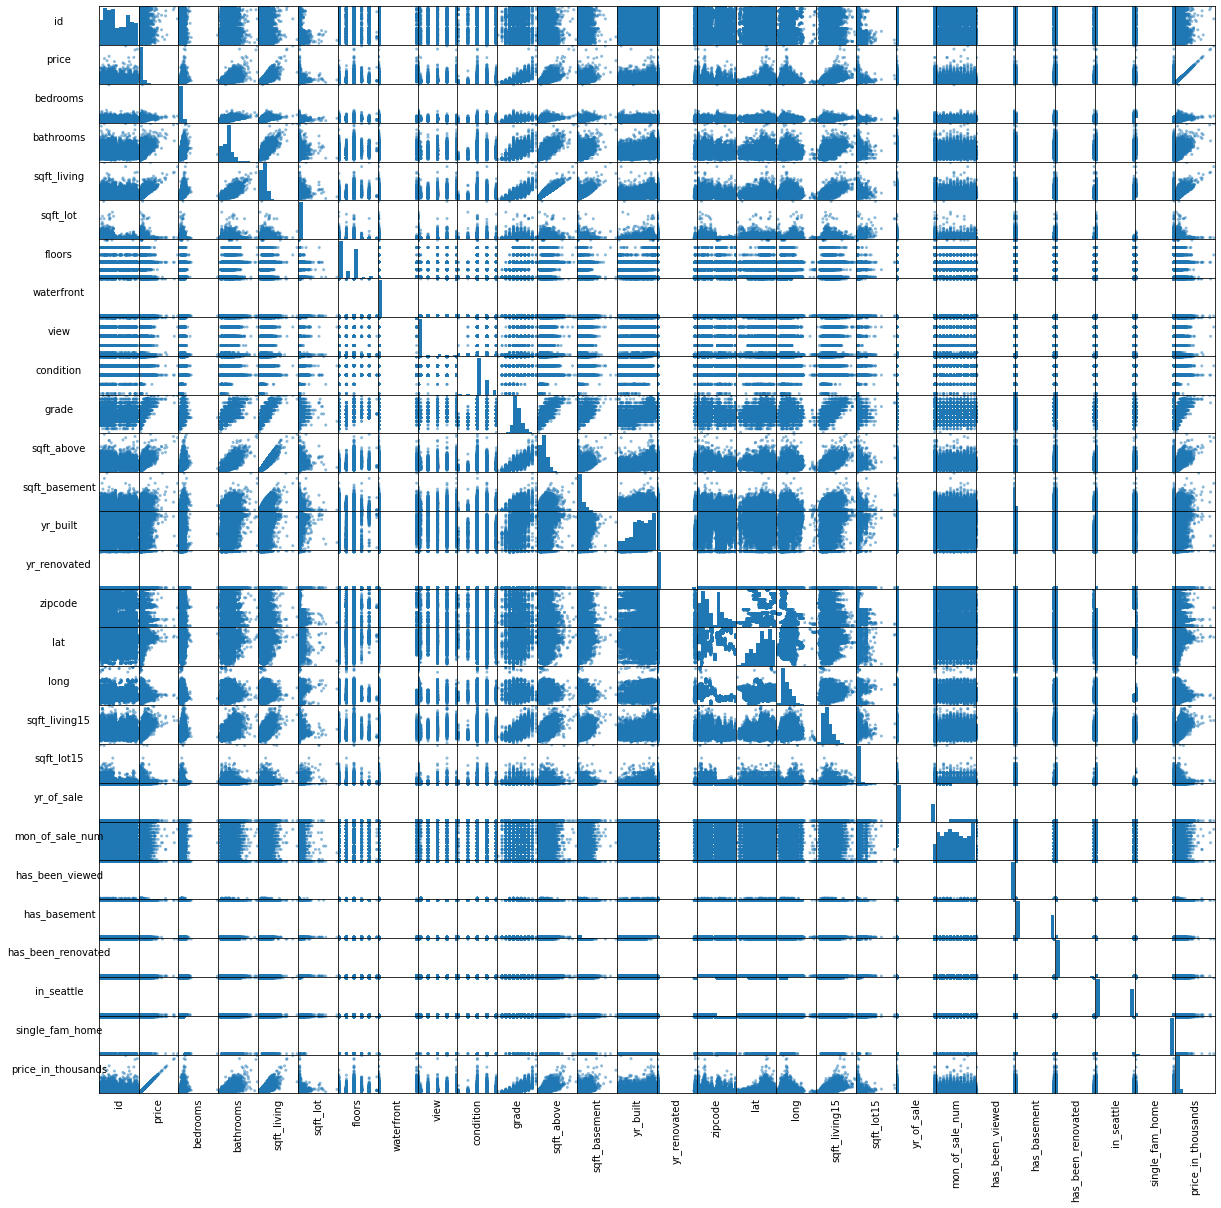

In [288]:
#scatter matrix - code from Multicollinearity lab lesson
sm = pd.plotting.scatter_matrix(data, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

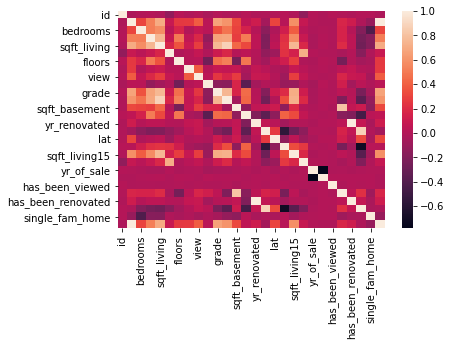

In [289]:
sns.heatmap(data.corr())

In [290]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,yr_of_sale,mon_of_sale_num,has_been_viewed,has_basement,has_been_renovated,in_seattle,single_fam_home,price_in_thousands
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,1.157486e-02,-0.023803,...,-0.002701,-0.138557,0.009915,-0.011572,1.206156e-02,0.003495,-0.010621,0.006668,0.009057,-0.016772
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,3.937486e-01,0.036056,...,0.585241,0.082845,0.003727,-0.009928,-1.202360e-02,0.178264,0.117543,-0.011959,-0.105903,1.000000
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,7.841807e-02,0.026496,...,0.393406,0.030690,-0.009949,-0.001046,-3.233350e-03,0.158412,0.017635,-0.184179,-0.406468,0.308787
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,1.860864e-01,-0.126479,...,0.569884,0.088303,-0.026577,0.007543,-2.738721e-03,0.159863,0.046742,-0.242732,-0.172900,0.525906
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,2.819173e-01,-0.059445,...,0.756402,0.184342,-0.029014,0.012112,-9.947942e-03,0.201198,0.050829,-0.261697,-0.178745,0.701917
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,7.512950e-02,-0.008830,...,0.144763,0.718204,0.005628,-0.002591,-3.934264e-03,-0.034889,0.005091,-0.175971,-0.008984,0.089876
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,2.840114e-02,-0.264075,...,0.280102,-0.010722,-0.022352,0.014245,9.991926e-04,-0.252465,0.003713,-0.052148,-0.032313,0.256804
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,3.806944e-01,0.016648,...,0.083823,0.030658,-0.005018,0.008199,-6.015252e-03,0.039220,0.074267,0.006124,-0.007978,0.264306
view,0.011575,0.393749,0.078418,0.186086,0.281917,0.075130,0.028401,0.380694,1.000000e+00,0.045676,...,0.279109,0.073174,0.001501,-0.005317,-1.913682e-08,0.177184,0.090401,0.075317,-0.044348,0.393749
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,4.567576e-02,1.000000,...,-0.093072,-0.003126,-0.045898,0.022388,-2.878424e-03,0.130542,-0.055383,0.037500,-0.011028,0.036056


In [291]:
data.corr().price.sort_values(ascending=False)
# Future question - check for multi collinearity between features

price_in_thousands    1.000000
price                 1.000000
sqft_living           0.701917
grade                 0.667951
sqft_above            0.605368
sqft_living15         0.585241
bathrooms             0.525906
view                  0.393749
sqft_basement         0.322192
bedrooms              0.308787
lat                   0.306692
waterfront            0.264306
floors                0.256804
has_basement          0.178264
yr_renovated          0.117855
has_been_renovated    0.117543
sqft_lot              0.089876
sqft_lot15            0.082845
yr_built              0.053953
condition             0.036056
long                  0.022036
yr_of_sale            0.003727
mon_of_sale_num      -0.009928
in_seattle           -0.011959
has_been_viewed      -0.012024
id                   -0.016772
zipcode              -0.053402
single_fam_home      -0.105903
Name: price, dtype: float64

In [292]:
#Average price across dataset, a baseline measurement
data['price'].mean()

540296.5735055795

In [293]:
# Try top 5
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']

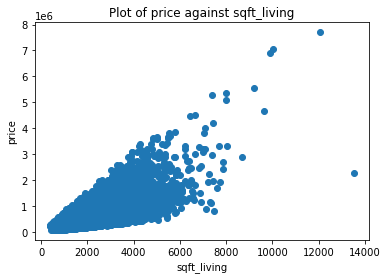

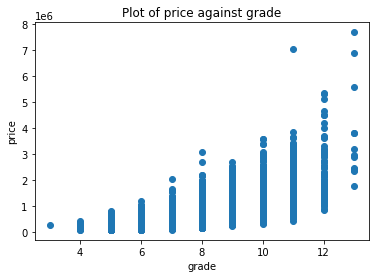

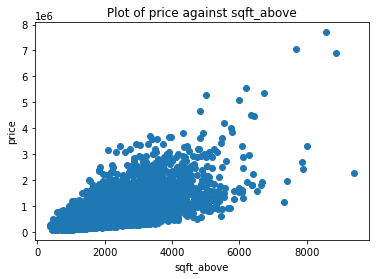

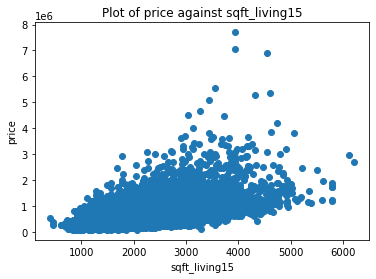

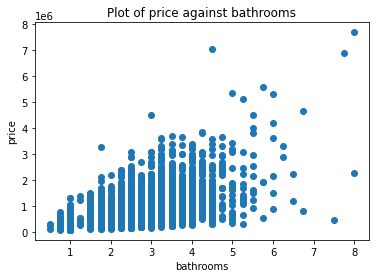

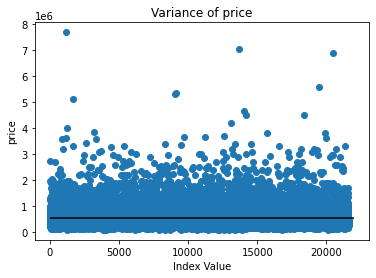

In [294]:
for x in features:
    plt.scatter(data[x], data['price'])
    plt.title(f'Plot of price against {x}')
    plt.xlabel(x)
    plt.ylabel('price')
    plt.show()
    
    
# also plot sales against itself
plt.scatter(data.index, data['price'])
plt.hlines(data['price'].mean(), 0, 22000)
plt.xlabel('Index Value')
plt.ylabel('price')
plt.title('Variance of price')
plt.show()

## Zipcode model beginnings

In [295]:
# Data Discovery on Zipcodes
zipcode_vals = data['zipcode'].unique()

In [296]:
#populate zipcode column
zipcode_overview['zipcode'] = zipcode_vals

NameError: name 'zipcode_overview' is not defined

In [ ]:
# Preview DataFrame
zipcode_overview

In [ ]:
pd.unique(data['zipcode'])

In [ ]:
#testing
data[data['zipcode'] == zipcode_vals[0]]['id'].count()

In [ ]:
# Populate rest of zipcode_overview DataFrame

# Create lists
zipcode_property_count = []
zipcode_long_min = []
zipcode_long_max = []
zipcode_lat_min = []
zipcode_lat_max = []
zipcode_price_min = []
zipcode_price_max = []
zipcode_price_avg = []
zipcode_price_med = []

# Get df values for each zipcode
for zipcode in zipcode_vals:
    zipcode_property_count.append(data[data['zipcode'] == zipcode]['id'].count())
    zipcode_long_min.append(data[data['zipcode'] == zipcode]['long'].min())
    zipcode_long_max.append(data[data['zipcode'] == zipcode]['long'].max())
    zipcode_lat_min.append(data[data['zipcode'] == zipcode]['lat'].min())
    zipcode_lat_max.append(data[data['zipcode'] == zipcode]['lat'].max())
    zipcode_price_min.append(data[data['zipcode'] == zipcode]['price'].min())
    zipcode_price_max.append(data[data['zipcode'] == zipcode]['price'].max())
    zipcode_price_avg.append(round(data[data['zipcode'] == zipcode]['price'].mean(), 0))
    zipcode_price_med.append(data[data['zipcode'] == zipcode]['price'].median())
    

# Assign lists to df columns
zipcode_overview['property_count'] = zipcode_property_count
zipcode_overview['long_min'] = zipcode_long_min
zipcode_overview['long_max'] = zipcode_long_max
zipcode_overview['lat_min'] = zipcode_lat_min
zipcode_overview['lat_max'] = zipcode_lat_max
zipcode_overview['price_min'] = zipcode_price_min
zipcode_overview['price_max'] = zipcode_price_max
zipcode_overview['price_avg'] = zipcode_price_avg
zipcode_overview['price_med'] = zipcode_price_med

In [ ]:
#Preview 
zipcode_overview

In [ ]:
# Are number of properties within zipcode impacting measurement - what zipcodes do I have most info about
zipcode_overview.groupby(by='zipcode')['property_count'].sum().sort_values(ascending=False)

In [ ]:
zipcode_overview['property_count'].describe()

In [ ]:
top_repped_zips_75 = zipcode_overview[zipcode_overview['property_count'] >= 408.25]['zipcode'].unique()

arr = top_repped_zips_75
top_repped_zips_75 = arr.tolist()

In [ ]:
top_zips_75_data_df = data[data['zipcode'].isin(top_repped_zips_75)]
top_zips_75_zo_df = zipcode_overview[zipcode_overview['zipcode'].isin(top_repped_zips_75)]

In [ ]:
top_zips_75_zo_df

In [ ]:
top_zips_75_zo_df['price_avg'].describe()

In [ ]:
top_zips_75_data_df[top_zips_75_data_df['price'] >= 619221.6]

In [ ]:
top_zips_75_data_df.groupby(by=['bedrooms'])['id'].count()

In [ ]:
# Do same with top 50% of property count for data expansion

top_repped_zips_50 = zipcode_overview[zipcode_overview['property_count'] >= 282.5]['zipcode'].unique()

arr = top_repped_zips_50
top_repped_zips_50 = arr.tolist()

top_zips_50_data_df = data[data['zipcode'].isin(top_repped_zips_50)]
top_zips_50_zo_df = zipcode_overview[zipcode_overview['zipcode'].isin(top_repped_zips_50)]

In [ ]:
# Look at how many zipcodes are represented in each
print(len(top_repped_zips_75))
print(len(top_repped_zips_50))

In [ ]:
# How much more info added in top 50 versus top 75
print(top_zips_75_data_df.shape)
print(top_zips_50_data_df.shape)

In [ ]:
# How is average price impacted
print(top_zips_75_data_df['price'].mean())
print(top_zips_50_data_df['price'].mean())

In [ ]:
# How is median price impacted
print(top_zips_75_data_df['price'].median())
print(top_zips_50_data_df['price'].median())

In [ ]:
top_zips_75_data_df['price'].describe()

In [ ]:
top_zips_50_data_df['price'].describe()

In [ ]:
# what if looking at grade - top 50
top_zips_50_data_df.groupby(by='grade')['id'].count()

In [ ]:
#  what if looking at grade - top 75
top_zips_75_data_df.groupby(by='grade')['id'].count()

In [ ]:
top_zips_50_zo_df

## Let's just try a shitty model

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
top_zips_50_data_df.columns.to_list()

## Removed categorical columns

In [ ]:
# Define our X and y

# neat trick; include all column names in a list except for target (price) and categoricals
X_cols = [c for c in top_zips_50_data_df.columns.to_list() if c not in ['id', 'date','price', 'has_been_viewed',
                                                                       'grade_category', 'has_basement', 
                                                                        'has_been_renovated']]

X = top_zips_50_data_df[X_cols]
y = top_zips_50_data_df['price']

In [ ]:
model = sm.OLS(y.astype(float), sm.add_constant(X.astype(float)))

In [ ]:
results = model.fit()

results.summary()

In [ ]:
model = sm.OLS(y.astype(float), sm.add_constant(X.astype(float)))

In [ ]:
results = model.fit()

results.summary()

## Scaler testing... didn't do anything...

In [ ]:
# Instantiate a scaler and scale our data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
scaled_model = sm.OLS(y, sm.add_constant(X_scaled))

In [ ]:
scaled_results = scaled_model.fit()

scaled_results.summary()

## Added Booleean columns back in - improved by 0.002

In [ ]:
# Define our X and y

# neat trick; include all column names in a list except for target (price) and categoricals
X_cols = [c for c in top_zips_50_data_df.columns.to_list() if c not in ['price', 'id', 'date', 'grade_category']]

X = top_zips_50_data_df[X_cols]
y = top_zips_50_data_df['price']

In [ ]:
model = sm.OLS(y.astype(float), sm.add_constant(X.astype(float)))

In [ ]:
results = model.fit()

results.summary()

## Copied from 20-ExtensionsToLinearModels, really

One hot encoding grade category, then modeled/tested

In [ ]:
cat_cols = ['grade_category']

In [ ]:
x_cols = [*X_cols, *cat_cols]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

In [ ]:
# create an encoder object. This will help us to convert
# categorical variables to new columns
# if test set could influence whatebeer you are fitting, you want to fit on the training data alone
encoder = OneHotEncoder(drop='first')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct = ColumnTransformer(transformers=[
    ('ohe', encoder, cat_cols) #name it, tell it what to do encoder, give it columns
], remainder='passthrough') #can do multiple transformers and scalers with ColumnTransform

ct.fit(top_zips_50_data_df[x_cols])
X = ct.transform(top_zips_50_data_df[x_cols])

In [ ]:
type(X)

In [ ]:
pd.DataFrame(X, columns= ct.get_feature_names()).head()

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
# scale our data (age and bmi are same scale, but number of children is not)
scaler = StandardScaler()

# train on train data
scaler.fit(X_train)

# transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# now, let's model!
lr = LinearRegression ()

lr.fit(X_train_scaled, y_train)

In [ ]:
train_preds = lr.predict(X_train_scaled)
test_preds = lr.predict(X_test_scaled)

In [ ]:
# evaluate
print(f"Train R2 { r2_score(y_train, train_preds)}")
print(f"Test R2 {r2_score(y_test, test_preds)}")
#model accounts for 72% of the variance in our target
print(f"Train RMSE {mean_squared_error(y_train, train_preds, squared=False)}") #set to False to get root mean squared error
print(f"Test RMSE {mean_squared_error(y_test, test_preds, squared=False)}")
# Results mean that model is ~177k off --> BAD

## Tried taking out the columns with p value > 0.05 and R-squared got worse

In [ ]:
# Define our X and y

# neat trick; include all column names in a list except for target (price) and categoricals
X_cols = [c for c in top_zips_50_data_df.columns.to_list() if c not in ['price', 'id', 'date', 'grade_category', 
                                                                        'floors', 'view', 'sqft_basement']]

X = top_zips_50_data_df[X_cols]
y = top_zips_50_data_df['price']

In [ ]:
model = sm.OLS(y.astype(float), sm.add_constant(X.astype(float)))

In [ ]:
results = model.fit()

results.summary()